# **Proyek Machine Learning Terapan**

Proyek Predictive Analysis: **Gold Price**
- Nama: **Luqman Hakim**
- Email: luqmanxhakim22042002@gmail.com
- Id Dicoding:2608610

# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import files
files.upload()  # Pilih file 'kaggle.json' yang telah diunduh

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"luqmanxhakim","key":"15f3b1854aea82ada0b6d7c6b3189972"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Dataset yang digunakan adalah [Gold Price Prediction](https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data) yang diambil dari platform Kaggle. File yang digunakan berupa file csv, yaitu `gld_price_data.csv`.

In [4]:
!kaggle datasets download -d altruistdelhite04/gold-price-data

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data
License(s): unknown
  0% 0.00/41.9k [00:00<?, ?B/s]
100% 41.9k/41.9k [00:00<00:00, 62.8MB/s]


In [5]:
!unzip gold-price-data.zip

Archive:  gold-price-data.zip
  inflating: gld_price_data.csv      


## Menampilkan Isi Dataset

In [6]:
df = pd.read_csv('/content/gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


# Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

## Deskripsi Variabel

Pengecekan informasi variabel dari dataset yaitu jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [7]:
#menampilan info lebih rinci pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Berdasarkan output di atas, terdapat 1 kolom dengan tipe data object, 5 kolom dengan tipe data float64.

In [8]:
#menampilkan jumlah baris dan kolom pada dataframe
df.shape

(2290, 6)

## Deskripsi Statistik

In [9]:
#menampilkan statistik deskriptif dari data frame
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Berdasarkan output diatas, didapatkan deskripsi statistik yaitu :
1. count : Jumlah sampel data
2. mean : Nilai rata-rata
3. std : Standar deviasi
4. min : Nilai minimum
5. 25% : Kuartil bawah/Q1
6. 50% : Kuartil tengah/Q2/median
7. 75% : Kuartil atas/Q3
8. max : Nilai maksimum

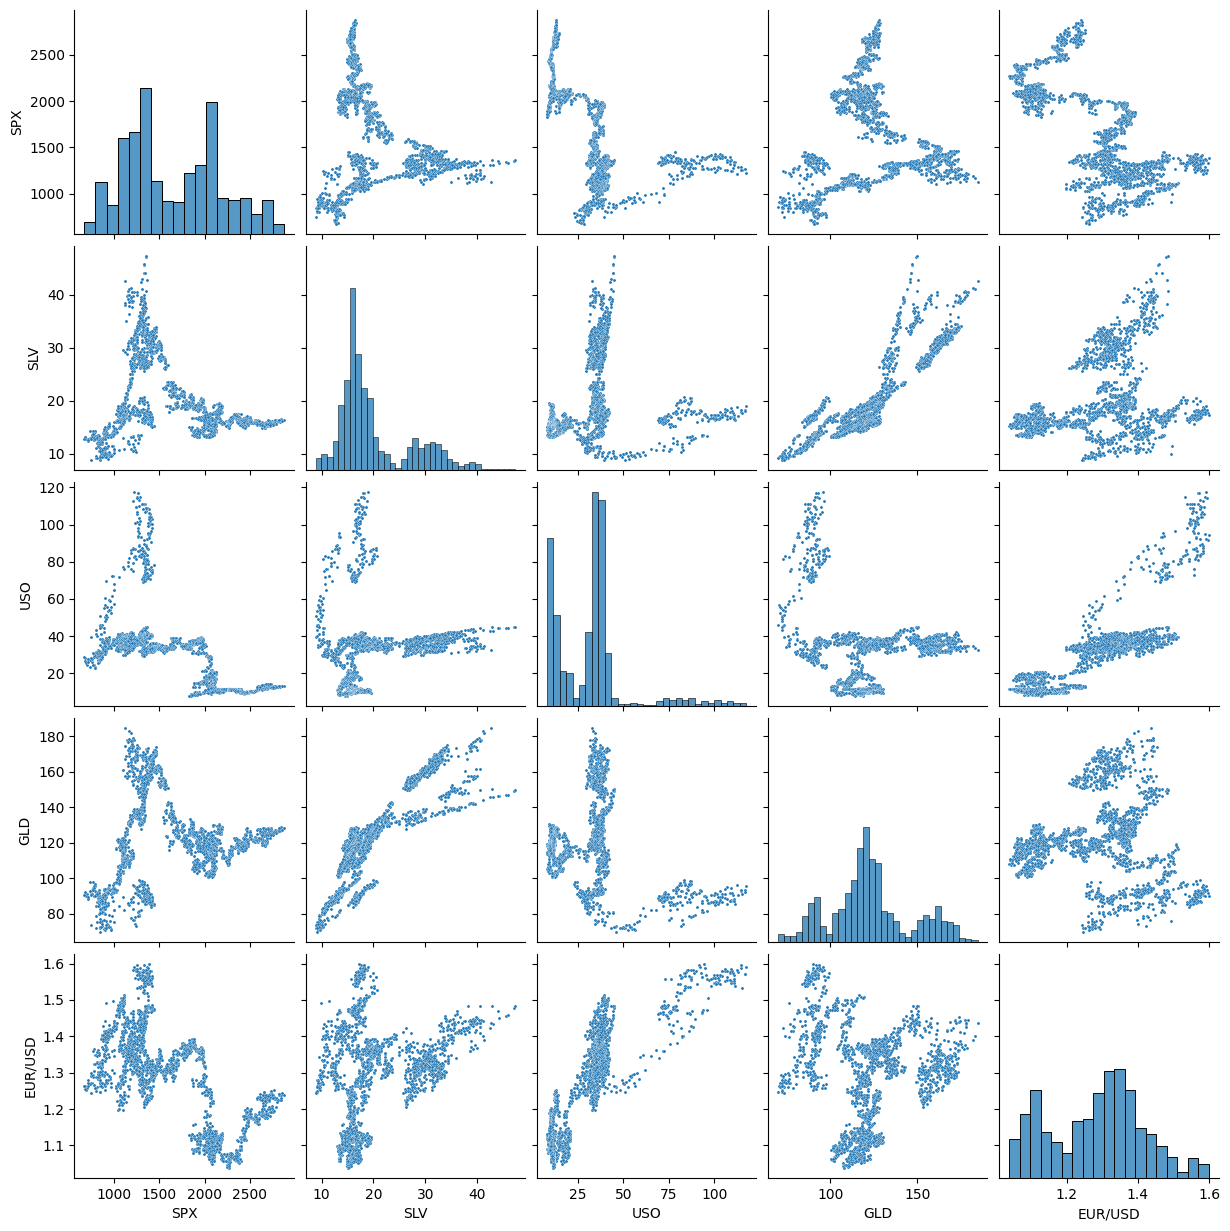

In [10]:
#visualisasi pairplot
sns.pairplot(df[['SPX','SLV','USO', 'GLD', 'EUR/USD']], plot_kws={"s": 5})

Berdasarkan grafik histogram yang berada pada diagonal utama pairplot, dapat disimpulkan sebagai berikut:

- Distribusi Harga Bervariasi: Setiap aset (SPX, SLV, USO, GLD, EUR/USD) memiliki pola distribusi harga yang unik, menunjukkan bahwa harga masing-masing aset cenderung berada pada rentang nilai yang berbeda-beda.
- Puncak Konsentrasi: Beberapa aset menunjukkan satu atau lebih puncak (mode) pada histogramnya, mengindikasikan bahwa harga aset tersebut seringkali terkonsentrasi di sekitar nilai-nilai tertentu.
- Tidak Semua Distribusi Normal: Distribusi harga tidak selalu simetris atau menyerupai kurva normal; ada yang cenderung miring (skewed) atau memiliki beberapa puncak.

In [11]:
#ubah kolom 'Date' menjadi datetime dan ekstrak hari, bulan, tahun
df = (
    df
    .assign(Date=pd.to_datetime(df['Date']))
    .assign(
        Day=lambda x: x['Date'].dt.day,
        Month=lambda x: x['Date'].dt.month,
        Year=lambda x: x['Date'].dt.year
    )
    .drop(columns='Date')
    .loc[:, ['Day', 'Month', 'Year', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']]
)
df

,Day,Month,Year,SPX,GLD,USO,SLV,EUR/USD
0,2,1,2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,3,1,2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,4,1,2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,7,1,2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,8,1,2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...,...,...
2285,8,5,2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,9,5,2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,10,5,2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,14,5,2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [12]:
#menghitung rata-rata GolD per tahun
years = df['Year'].unique()
average_prices = []

for year in sorted(years):
    mean_price = df[df['Year'] == year]['GLD'].mean()
    average_prices.append({'Year': year, 'GLD': mean_price})

average_prices_per_year = pd.DataFrame(average_prices)
average_prices_per_year

,Year,GLD
0,2008,86.111148
1,2009,95.834464
2,2010,119.966397
3,2011,152.591486
4,2012,162.151507
5,2013,136.853213
6,2014,121.721294
7,2015,111.165561
8,2016,118.780634
9,2017,119.546101


In [13]:
#menampilkan missing value
df.isna().sum()

,0
Day,0
Month,0
Year,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [14]:
#menampilkan duplikat data
df.duplicated().sum()

np.int64(0)

In [15]:
#menampilkan outliers
desc = df['GLD'].describe()
iqr = desc['75%'] - desc['25%']
lower_bound = desc['25%'] - 1.5 * iqr
upper_bound = desc['75%'] + 1.5 * iqr

outliers1 = df.query("GLD < @lower_bound")
outliers2 = df.query("GLD > @upper_bound")

print(outliers1)
print(outliers2)

     Day  Month  Year          SPX        GLD        USO    SLV   EUR/USD
137   10      9  2008  1232.040039  74.220001  82.970001  10.60  1.399600
138   11      9  2008  1249.050049  73.080002  81.489998  10.32  1.423994
161   22     10  2008   896.780029  71.709999  54.930000   9.45  1.294498
162   23     10  2008   908.109985  70.650002  56.599998   9.38  1.262993
163   27     10  2008   848.919983  72.180000  50.849998   8.85  1.246463
164   28     10  2008   940.510010  73.790001  53.220001   9.05  1.280902
165   29     10  2008   930.090027  74.000000  55.680000   9.67  1.295924
166   30     10  2008   954.090027  72.709999  54.000000   9.68  1.286803
167   31     10  2008   968.750000  71.339996  55.590000   9.58  1.270196
168    3     11  2008   966.299988  71.099998  52.490002   9.62  1.261798
170    5     11  2008   952.770020  72.800003  53.840000  10.21  1.291806
171    6     11  2008   904.880005  72.220001  50.150002   9.90  1.269503
172    7     11  2008   930.989990  72

In [16]:
#menangani outliers
median_value = df['GLD'].median()
df['GLD'] = df['GLD'].apply(
    lambda x: median_value if x < lower_bound or x > upper_bound else x
)

print(df)

      Day  Month  Year          SPX         GLD        USO      SLV   EUR/USD
0       2      1  2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1       3      1  2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2       4      1  2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3       7      1  2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4       8      1  2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...   ...    ...   ...          ...         ...        ...      ...       ...
2285    8      5  2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286    9      5  2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287   10      5  2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288   14      5  2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289   16      5  2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 8 columns]


## Memisahkan fitur dan target

In [17]:
y = df.loc[:, 'GLD']
X = df.drop(columns=y.name)
X = X.drop(['Day', 'Month', 'Year'], axis=1)

## Train test split

In [18]:
data_split = train_test_split(X, y, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = data_split

## Normalisasi Data

In [19]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])
print(X_test_scaled[:5])

[[0.21220486 0.29063185 0.21741478 0.5804562 ]
 [0.70115292 0.02437911 0.18793942 0.0446866 ]
 [0.01115755 0.15084003 0.10600324 0.39104325]
 [0.90926503 0.03588386 0.18171984 0.33504243]
 [0.53392282 0.22899927 0.28583016 0.59000016]]
[[0.31025261 0.27730096 0.65035156 0.51418101]
 [0.2733027  0.78469686 0.12439156 0.77994923]
 [0.55283418 0.00867421 0.14845862 0.14563128]
 [0.69121269 0.02739226 0.26419688 0.15848729]
 [0.77005968 0.02483565 0.22904271 0.0507332 ]]


# Modelling

## Model Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

In [21]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
param_grid = {'copy_X': [True, False],
              'fit_intercept': [True, False],
              'n_jobs': [None],
              'positive': [True, False]}

In [23]:
grid_search = GridSearchCV(lin_reg,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

In [24]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [25]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Parameter terbaik untuk model Linear Regression adalah:", best_params)
print("Skor Mean Squared Error (MSE) terbaik untuk model Regresi Linear adalah:", best_score)

Parameter terbaik untuk model Linear Regression adalah: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}
Skor Mean Squared Error (MSE) terbaik untuk model Regresi Linear adalah: -312.7666775104881


## Model Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [27]:
rf = RandomForestRegressor()

In [28]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [30]:
grid_search = GridSearchCV(rf,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

In [31]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [32]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Parameter terbaik untuk model Random Forest Regressor adalah:", best_params)
print("Skor Mean Squared Error (MSE) terbaik untuk model Random Forest Regression adalah:", best_score)

Parameter terbaik untuk model Random Forest Regressor adalah: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Skor Mean Squared Error (MSE) terbaik untuk model Random Forest Regression adalah: -178.96356332997183


# Evaluasi

In [33]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

metrics = pd.DataFrame(index=['Linear Regression', 'Random Forest Regressor'])

models = {
    'Linear Regression': lin_reg,
    'Random Forest Regressor': rf_reg
}

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics.loc[name, 'MAE Train'] = round(mean_absolute_error(y_train, y_train_pred), 3)
    metrics.loc[name, 'MAE Test'] = round(mean_absolute_error(y_test, y_test_pred), 3)
    metrics.loc[name, 'MSE Train'] = round(mean_squared_error(y_train, y_train_pred), 3)
    metrics.loc[name, 'MSE Test'] = round(mean_squared_error(y_test, y_test_pred), 3)
    metrics.loc[name, 'R2 Train'] = round(r2_score(y_train, y_train_pred), 3)
    metrics.loc[name, 'R2 Test'] = round(r2_score(y_test, y_test_pred), 3)

display(metrics)

,MAE Train,MAE Test,MSE Train,MSE Test,R2 Train,R2 Test
Linear Regression,8.343,8.018,132.806,126.818,0.683,0.691
Random Forest Regressor,0.831,2.197,4.363,33.551,0.990,0.918


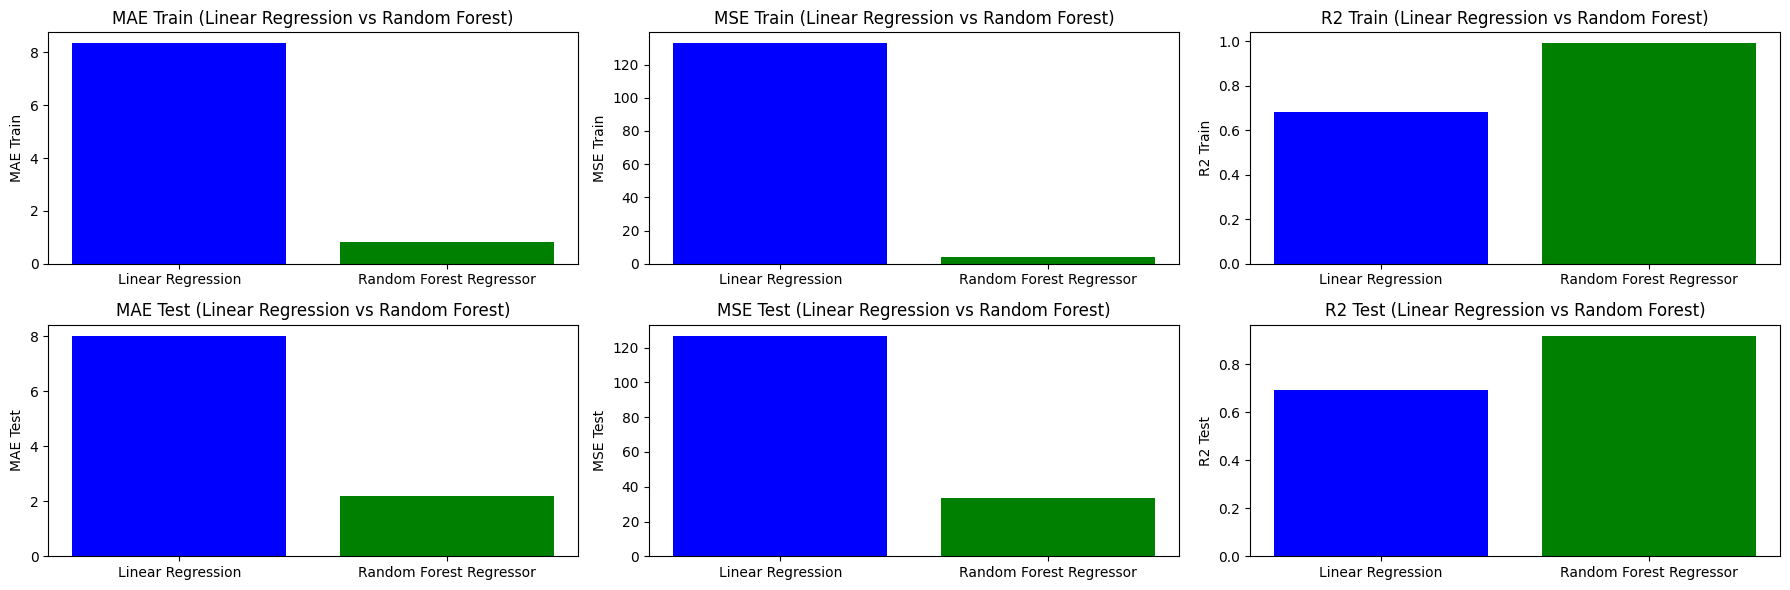

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(18, 6))
colors = {'Linear Regression': 'blue', 'Random Forest Regressor': 'green'}

metrics_columns = ['MAE Train', 'MSE Train', 'R2 Train', 'MAE Test', 'MSE Test', 'R2 Test']
titles = ['MAE Train', 'MSE Train', 'R2 Train', 'MAE Test', 'MSE Test', 'R2 Test']

for i, ax in enumerate(axes.flatten()):
    ax.bar(metrics.index, metrics[metrics_columns[i]].values,
           color=[colors.get(name, 'gray') for name in metrics.index])
    ax.set_title(titles[i] + ' (Linear Regression vs Random Forest)')
    ax.set_ylabel(titles[i])

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, dapat disimpulkan yaitu:

- Model Random Forest Regressor Unggul Secara Signifikan: Pada semua metrik evaluasi (MAE, MSE, dan R2) baik pada data latih (Train) maupun data uji (Test), model Random Forest Regressor (batang hijau) secara konsisten menunjukkan kinerja yang jauh lebih baik dibandingkan dengan model Linear Regression (batang biru).

  - MAE dan MSE (Semakin Rendah Semakin Baik): Nilai MAE (Mean Absolute Error) dan MSE (Mean Squared Error) untuk Random Forest Regressor jauh lebih rendah dibandingkan Linear Regression, menunjukkan bahwa prediksi Random Forest memiliki kesalahan yang lebih kecil dan lebih akurat.
  - R2 (Semakin Tinggi Semakin Baik): Nilai R2 (Coefficient of Determination) untuk Random Forest Regressor mendekati 1 (sangat tinggi), sementara Linear Regression jauh lebih rendah. Ini berarti Random Forest Regressor mampu menjelaskan variabilitas data jauh lebih baik daripada Linear Regression.
- Linear Regression Memiliki Kinerja yang Buruk: Model Linear Regression menunjukkan nilai MAE dan MSE yang sangat tinggi serta nilai R2 yang rendah, mengindikasikan bahwa model ini kurang efektif dalam memprediksi data ini.

- Generalisasi Model Random Forest Lebih Baik: Perbedaan kinerja antara data latih dan data uji untuk Random Forest Regressor relatif kecil, menunjukkan bahwa model ini mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya (data uji) dan tidak mengalami overfitting yang parah. Sebaliknya, Linear Regression menunjukkan kinerja yang buruk di kedua set data.

In [37]:
pred = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in models.items():
    pred_dict[name] = model.predict(pred).round(3)

pd.DataFrame(pred_dict)

,y_true,Linear Regression,Random Forest Regressor
903,120.580002,148.668,130.717


Berdasarkan output tabel di atas dapat dilihat bahwa urutan algoritma yang paling mendekati dengan nilai y_true adalah Random Forest. Nilai y_true sebesar 120.580002 dan nilai prediksi Random Forest sebesar 130.717.